In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **importing given datasets**

In [3]:
customers_url = 'https://raw.githubusercontent.com/SetuKaswan/zeotap/refs/heads/main/Customers.csv'
products_url = 'https://raw.githubusercontent.com/SetuKaswan/zeotap/refs/heads/main/Products.csv'
transactions_url = 'https://raw.githubusercontent.com/SetuKaswan/zeotap/refs/heads/main/Transactions.csv'

In [4]:
from urllib.request import urlretrieve
urlretrieve(customers_url, 'customers.csv')
urlretrieve(products_url, 'products.csv')
urlretrieve(transactions_url, 'transactions.csv')

('transactions.csv', <http.client.HTTPMessage at 0x7968dfc81a50>)

# Loading the given files into **dataframes**

In [6]:
customers_df = pd.read_csv('customers.csv')
products_df = pd.read_csv('products.csv')
transactions_df = pd.read_csv('transactions.csv')

# **Viewing the dataset contents**

In [9]:
customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [10]:
products_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [11]:
transactions_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


# **Checking for null values for data cleaning**

In [21]:
customers_df.info()
customers_df.isnull().sum()
products_df.info()
products_df.isnull().sum()
transactions_df.info()
transactions_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


# finding duplicate values

In [22]:
customers_df.duplicated().sum()
products_df.duplicated().sum()
transactions_df.duplicated().sum()


0

# Standardizing date format

In [23]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

**Combining datasets for meaningful EDA**

In [24]:
merged_data = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


# **Univariate analysis**

<ipython-input-26-3b7c8183971b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index, palette='pastel')


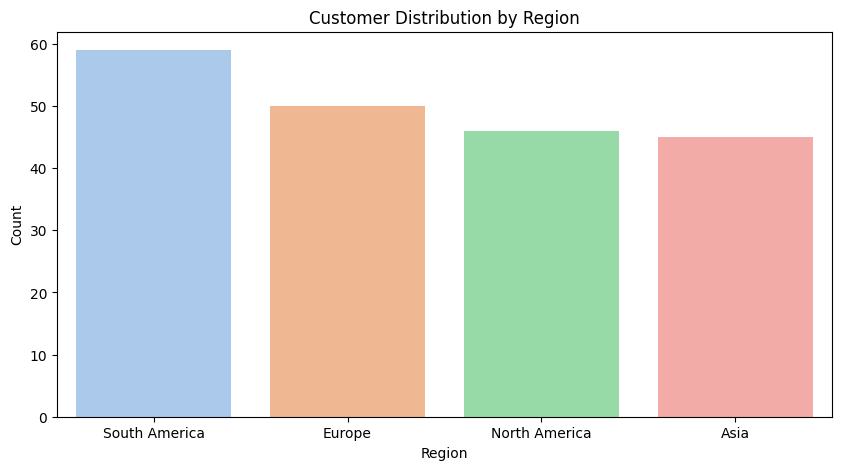

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customers_df, x='Region', order=customers_df['Region'].value_counts().index, palette='pastel')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

<ipython-input-28-7cd13ef00753>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index, palette='coolwarm')


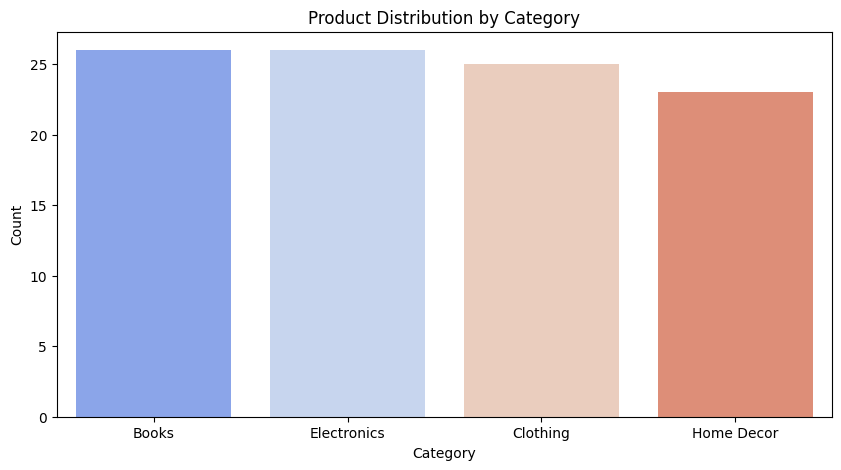

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index, palette='coolwarm')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

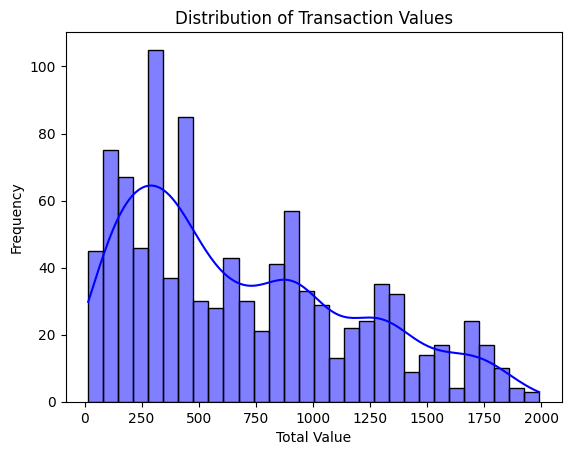

In [29]:
sns.histplot(transactions_df['TotalValue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

# **Bivariate Analysis**

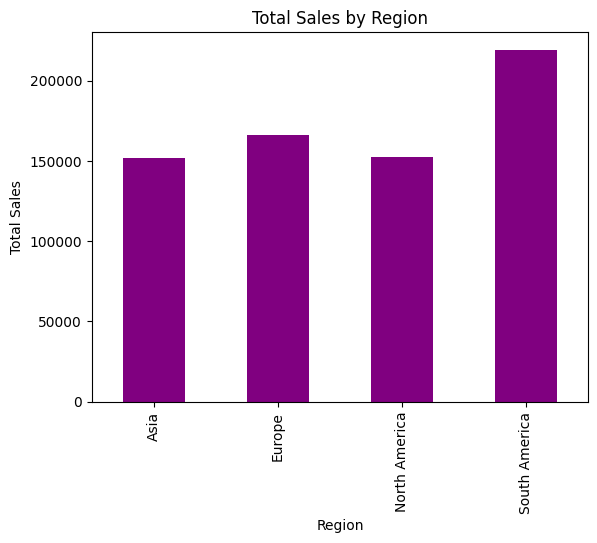

In [30]:
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()
sales_by_region.plot(kind='bar', color='purple', title='Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

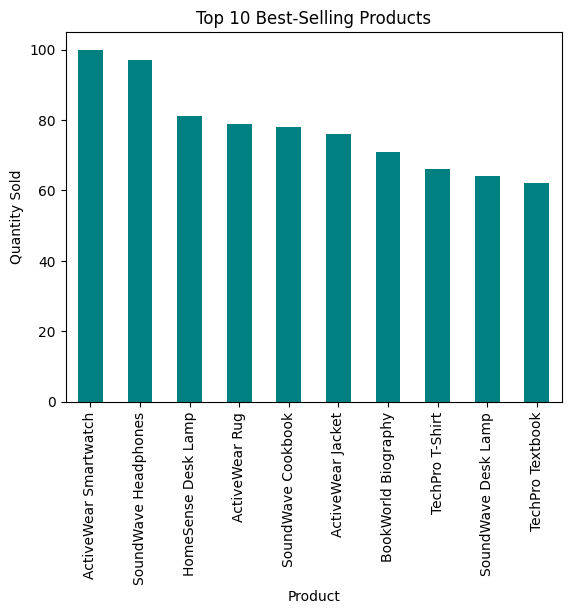

In [34]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='teal', title='Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.show()

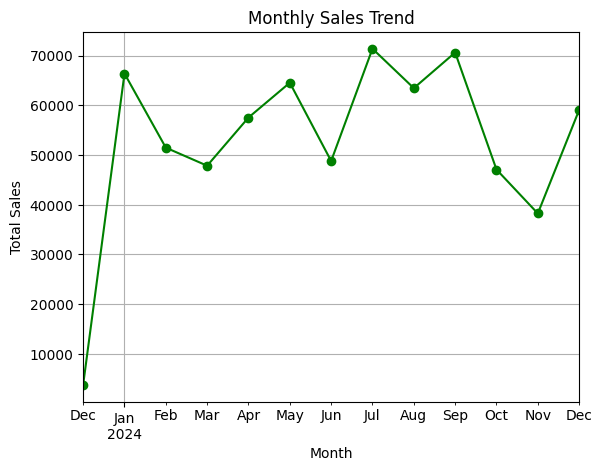

In [35]:
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', color='green', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()